# Computational Astrophysics
## 03. Creating Synthetic Data
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

### About this notebook

In this worksheet we use the `pandas` package to read a dataset given in a .csv file. 

---

### Creating the data

We use the function `astroML,datasets.generate_mu_z` to generate a dataset of distance modulus vs. redshift for 200 supernovas, including errors in the distance modulus. The samples are randomly selected from a distribution

$\mu (z) = -5 \log _{10} \left[ (1+z) \frac{c}{H_0} \int \frac{dz}{\left(\Omega_m (1+z)^3 + \Omega_\Lambda \right)^{1/2}} \right]$

where $\mu (z)$ is the distance modulus to the supernova, $H_0$ is the Hubble constant, $\Omega_m$ is the cosmological matter density and $\Omega_\Lambda$ is the energy density from a cosmological constant. The used cosmological parameters for the synthetic data are

$H_0 = 70 \textrm{ km } \textrm{s}^{-1} \textrm{Mpc}^{-1}$\
$\Omega_m = 0.3$\
$\Omega_\Lambda = 0.7$

The detailed information about this function and the cosmological parameters in the model can be found at

https://www.astroml.org/modules/generated/astroML.datasets.generate_mu_z.html


In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from astroML.datasets import generate_mu_z
from astropy.cosmology import LambdaCDM

In [2]:
from astroML.datasets import generate_mu_z

z_sample, mu_sample, dmu = generate_mu_z(200, random_state=0) #generate 200 synthetic datapoints

In order to compare the synthetic data from the `astroML` package, we will also obtain a dataset using the function `LambdaCDM` from the `astropy.cosmology` package. Here, we assume a FLRW cosmology with a cosmological constant and curvature. The used parameters are the same as above,

$H_0 = 70 \textrm{ km } \textrm{s}^{-1} \textrm{Mpc}^{-1}$\
$\Omega_m = 0.3$\
$\Omega_\Lambda = 0.7$

The distance modulus is calculated using the method `.distmod(z)`. More information about this function is given at

https://docs.astropy.org/en/stable/api/astropy.cosmology.LambdaCDM.html#

In [3]:
from astropy.cosmology import LambdaCDM

z = np.linspace(0.01, 2, 1000)
cosmo = LambdaCDM(H0=70, Om0=0.30, Ode0=0.70, Tcmb0=0)
mu_true = cosmo.distmod(z)

Now, we will plot the datapoints with errors form `astroML` together with the curve from `astropy`.

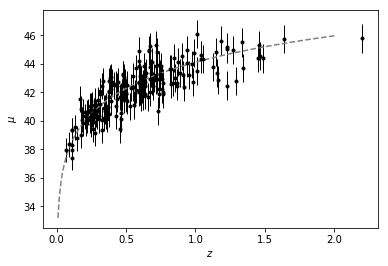

In [4]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', lw=1)
plt.plot(z, mu_true, '--', c='gray')
plt.xlabel(r'$z$')
plt.ylabel(r'$\mu$')

plt.show()

### Saving data as a .csv file

In order to save the synthetic data into a .csv file, let see the shape of the data

In [5]:
z_sample.shape

(200,)

In [6]:
mu_sample.shape

(200,)

Now, we combine the columns into one 2D-array

In [7]:
data_sample = np.vstack((z_sample, mu_sample)).T
data_sample.shape

(200, 2)

In [8]:
data_sample

array([[ 0.57416292, 43.69117415],
       [ 0.73936191, 42.25032342],
       [ 0.62229066, 41.73437759],
       [ 0.5707984 , 42.18580439],
       [ 0.47362125, 41.64205226],
       [ 0.66396834, 44.85763708],
       [ 0.48428575, 43.06526288],
       [ 1.04004904, 44.30182638],
       [ 1.34396959, 43.68809925],
       [ 0.44329774, 42.73139492],
       [ 0.84158293, 42.66925181],
       [ 0.55728238, 41.07044561],
       [ 0.59088366, 43.82760805],
       [ 1.14734314, 44.79576494],
       [ 0.18862724, 40.61792401],
       [ 0.20621901, 40.29672399],
       [ 0.11335508, 39.32823933],
       [ 0.90977923, 43.21688472],
       [ 0.82144751, 42.57212606],
       [ 0.98612721, 44.74020202],
       [ 1.48406527, 44.37375708],
       [ 0.85308185, 43.00763422],
       [ 0.50281672, 41.83743641],
       [ 0.82489324, 43.60521507],
       [ 0.23679328, 40.02805016],
       [ 0.65799365, 41.66150212],
       [ 0.25923566, 39.98683896],
       [ 1.22978992, 42.46172267],
       [ 0.55140772,

Now, we save this array as a .csv file using the `numpy.savetxt()` function 

In [9]:
np.savetxt('data_sample.csv', data_sample, delimiter=',', header="z_sample,mu_sample", comments='')